## Q2) Classify the Size_Categorie using SVM- Forest fires

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
data.shape

(517, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
month            517 non-null object
day              517 non-null object
FFMC             517 non-null float64
DMC              517 non-null float64
DC               517 non-null float64
ISI              517 non-null float64
temp             517 non-null float64
RH               517 non-null int64
wind             517 non-null float64
rain             517 non-null float64
area             517 non-null float64
dayfri           517 non-null int64
daymon           517 non-null int64
daysat           517 non-null int64
daysun           517 non-null int64
daythu           517 non-null int64
daytue           517 non-null int64
daywed           517 non-null int64
monthapr         517 non-null int64
monthaug         517 non-null int64
monthdec         517 non-null int64
monthfeb         517 non-null int64
monthjan         517 non-null int64
monthjul         517 non-null int64
monthjun     

In [5]:
# Checking for the duplicate rows
data.duplicated().sum()

8

In [6]:
# Dropping the duplicate rows
data=data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
# No of rows and columns 
data.shape

(509, 31)

In [8]:
#Describing the data
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Converting categorical to Numeric
le = LabelEncoder()
data['size_num'] = le.fit_transform(data['size_category'])
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,size_num
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,1


In [10]:
#Checking the correlation between the features
data.iloc[:,1:10].corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000


In [11]:
#Dropping month, day, size category columns
data_final = data.drop(['month','day', 'size_category'],axis=1)
data_final.shape

(509, 29)

Text(0.5, 1, 'pair plots to understand correlation')

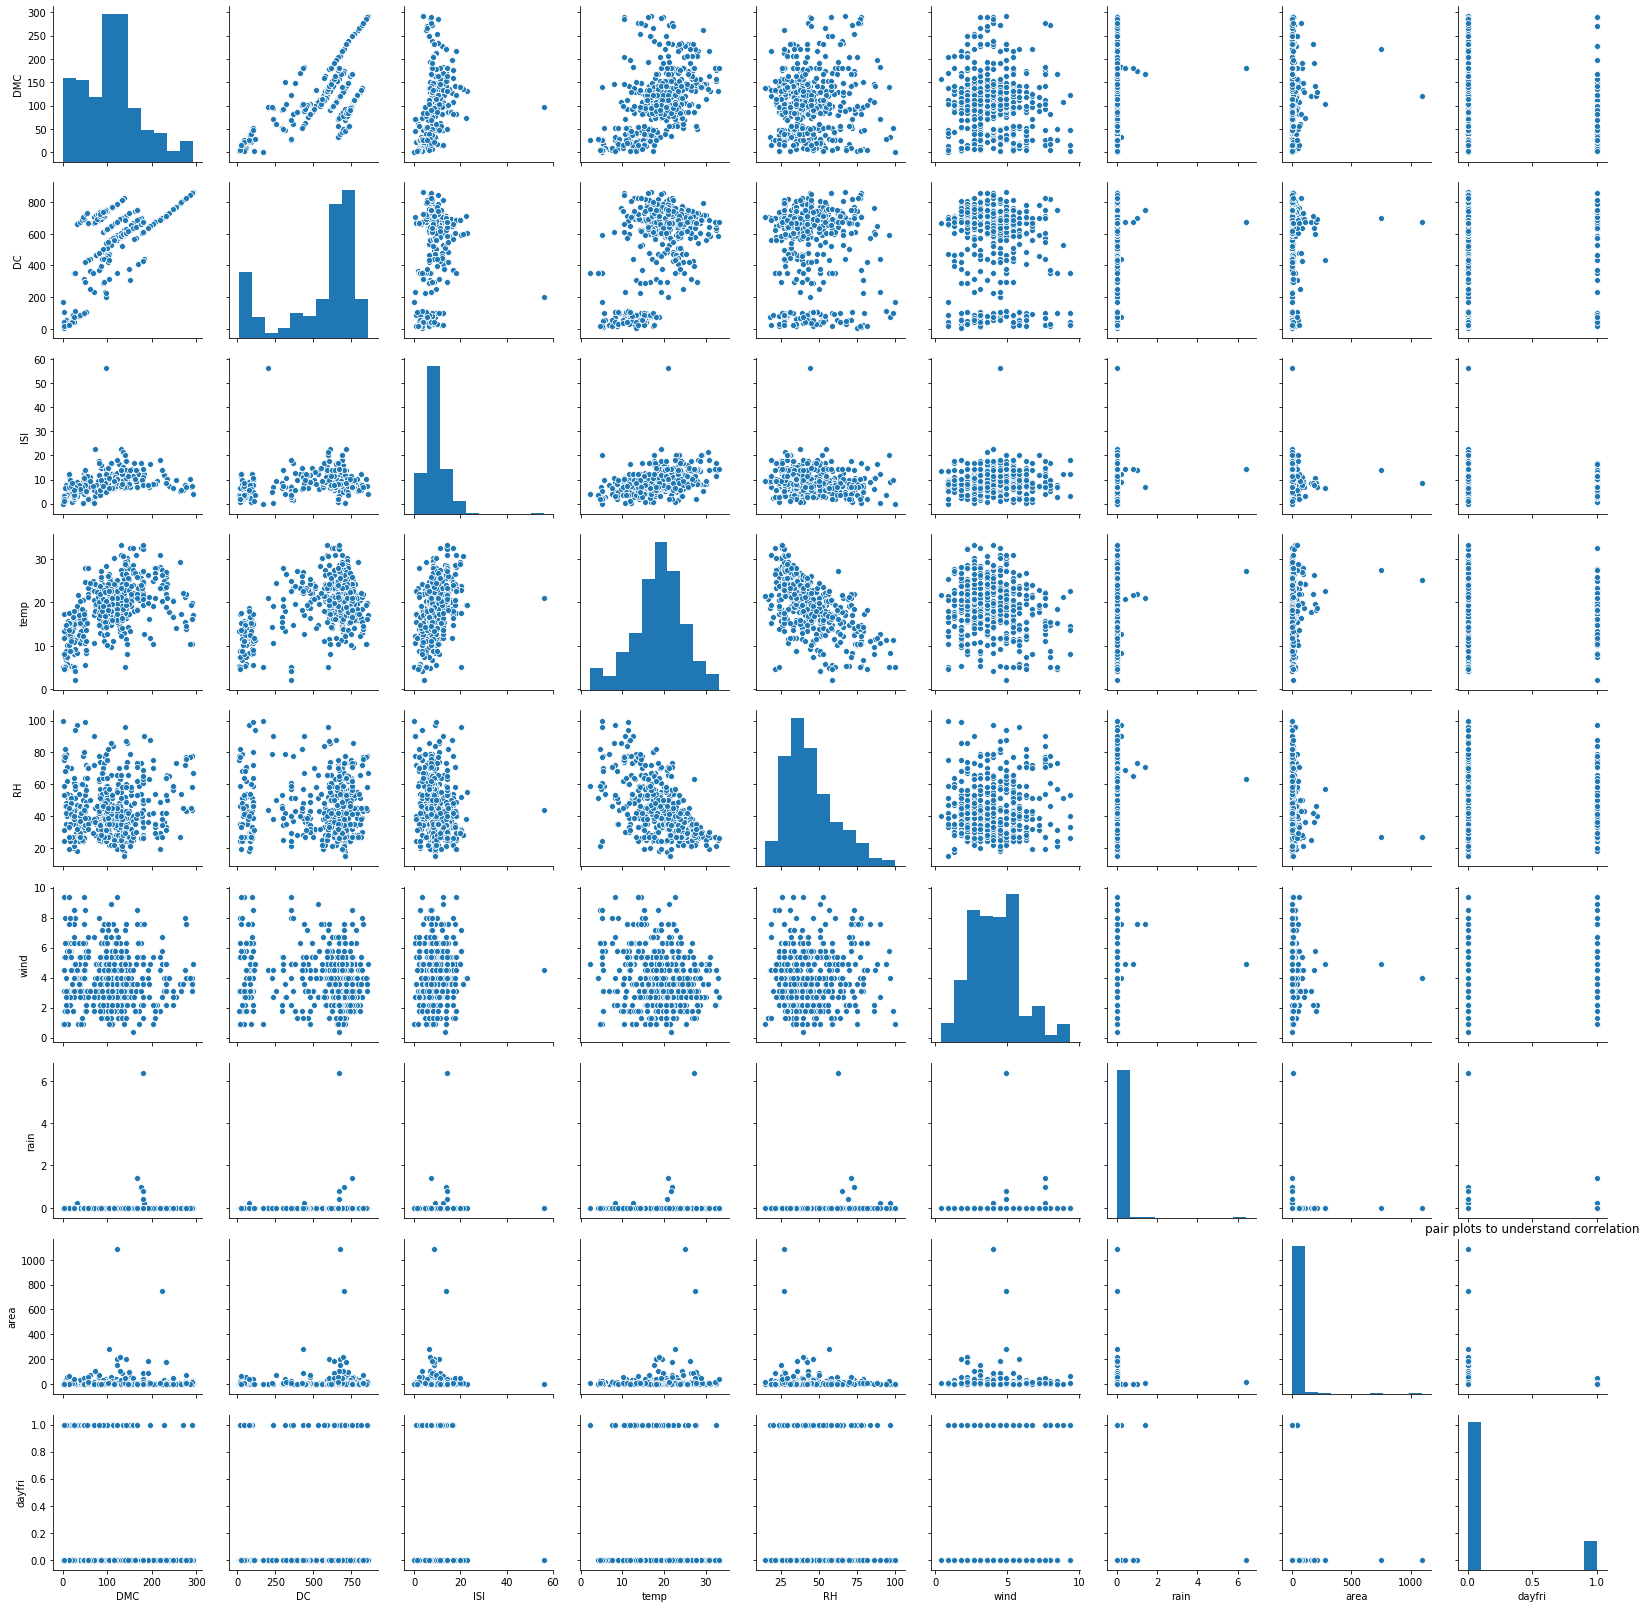

In [12]:
#plotting features
sns.pairplot(data_final.iloc[:,1:10])
plt.title('pair plots to understand correlation')

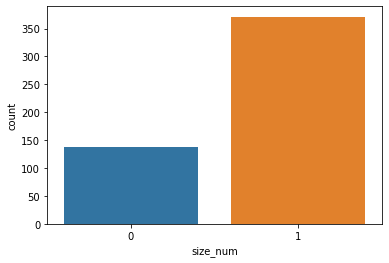

In [13]:
sns.countplot(data_final['size_num'])

In [14]:
#Splitting data
X = data_final.drop(['size_num'],axis=1)
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
y= data_final['size_num']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_num, dtype: int32

In [16]:
# Splitting data into X_train, X_test, y_train, y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

## SVC Algorithm

### Using Grid search CV

In [17]:
# Grid search CV to find better parameters based on SVC
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.001,0.01],'degree': [0.1,1,10,100],'C':[0.1,1,2,5,10,50] }] # Used poly method and few values of C, degree and gamma as well. Have taken best values
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 2, 5, 10, 50],
                          'degree': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
# As per grid sreach CV best parameters and score
gsv.best_params_ , gsv.best_score_ 

({'C': 50, 'degree': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}, 0.8624078624078624)

### Final SVC model

In [19]:
#Creating a final model with the best parameters
clf = SVC(C= 2, degree= 0.1, gamma= 0.001, kernel= 'rbf')
clf.fit(X_train , y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0.1, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Predictions and model accuracy

In [20]:
#Predicting the values 
y_pred = clf.predict(X_test)
#Accuracy of model
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
# Confusion matrix
confusion_matrix(y_test, y_pred)

Accuracy = 87.25490196078431


array([[13, 12],
       [ 1, 76]], dtype=int64)